## 한글 폰트 설치

In [1]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab 경우 Reuntime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
Font directories:
	/root/.local/share/fonts
	/usr/local/share/fonts
	/usr/share/fonts
	/root/.fonts
	/usr/share/fonts/truetype
	/usr/share/fonts/truetype/dejavu
	/usr/share/fonts/truetype/liberation
	/usr/share/fonts/truetype/nanum
/root/.local/share/fonts: skipping, no such directory
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/root/.fonts: skipping, no such directory
/usr/shar

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

## data

In [4]:
import pandas as pd
import numpy as np

In [5]:
import pymongo

client = pymongo.MongoClient("192.168.10.240", 27017)
db = client['AI_LKJ']
collection_data_tour_pass_total_consume = db['data_tour_pass_total_consume']

data_tour_pass_total_consume = collection_data_tour_pass_total_consume.find()
df_tourpass_consume = pd.DataFrame(data_tour_pass_total_consume)

In [6]:
df_tourpass_consume

,_id,date,total_consume,region
0,66416c052fd6bba041cf13b7,201912,763000000,경기
1,66416c052fd6bba041cf13b8,201901,679000000,경기
2,66416c052fd6bba041cf13b9,201902,638000000,경기
3,66416c052fd6bba041cf13ba,201903,780000000,경기
4,66416c052fd6bba041cf13bb,201904,732000000,경기
...,...,...,...,...
235,66416c052fd6bba041cf14a2,202307,91300000,제주
236,66416c052fd6bba041cf14a3,202308,103000000,제주
237,66416c052fd6bba041cf14a4,202309,81500000,제주
238,66416c052fd6bba041cf14a5,202310,93000000,제주


In [7]:
df_tourpass_consume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   _id            240 non-null    object
 1   date           240 non-null    int64 
 2   total_consume  240 non-null    int64 
 3   region         240 non-null    object
dtypes: int64(2), object(2)
memory usage: 7.6+ KB


In [8]:
df_tourpass_consume['date'] = pd.to_datetime(df_tourpass_consume['date'], format="%Y%m")
df_tourpass_consume['date_year'] = df_tourpass_consume['date'].dt.year
df_tourpass_consume['date_month'] = df_tourpass_consume['date'].dt.month

In [9]:
df_tourpass_consume

,_id,date,total_consume,region,date_year,date_month
0,66416c052fd6bba041cf13b7,2019-12-01,763000000,경기,2019,12
1,66416c052fd6bba041cf13b8,2019-01-01,679000000,경기,2019,1
2,66416c052fd6bba041cf13b9,2019-02-01,638000000,경기,2019,2
3,66416c052fd6bba041cf13ba,2019-03-01,780000000,경기,2019,3
4,66416c052fd6bba041cf13bb,2019-04-01,732000000,경기,2019,4
...,...,...,...,...,...,...
235,66416c052fd6bba041cf14a2,2023-07-01,91300000,제주,2023,7
236,66416c052fd6bba041cf14a3,2023-08-01,103000000,제주,2023,8
237,66416c052fd6bba041cf14a4,2023-09-01,81500000,제주,2023,9
238,66416c052fd6bba041cf14a5,2023-10-01,93000000,제주,2023,10


## 전체 데이터 확인

- 투어패스가 등장한 시점
- 제주 : 2021년 3월
- 부산 : 2022년 2월
- 강원 : 2023년 7월
- 경기 : 2023년 7월

In [21]:
df_tourpass_consume

,_id,date,total_consume,region,date_year,date_month
0,66416c052fd6bba041cf13b7,2019-12-01,763000000,경기,2019,12
1,66416c052fd6bba041cf13b8,2019-01-01,679000000,경기,2019,1
2,66416c052fd6bba041cf13b9,2019-02-01,638000000,경기,2019,2
3,66416c052fd6bba041cf13ba,2019-03-01,780000000,경기,2019,3
4,66416c052fd6bba041cf13bb,2019-04-01,732000000,경기,2019,4
...,...,...,...,...,...,...
235,66416c052fd6bba041cf14a2,2023-07-01,91300000,제주,2023,7
236,66416c052fd6bba041cf14a3,2023-08-01,103000000,제주,2023,8
237,66416c052fd6bba041cf14a4,2023-09-01,81500000,제주,2023,9
238,66416c052fd6bba041cf14a5,2023-10-01,93000000,제주,2023,10


In [22]:
grouped = df_tourpass_consume.query("region == '제주'")
grouped2 = df_tourpass_consume.query("region == '제주' and date_month == 3")

highlight_date = pd.to_datetime('2021-03-01')
highlight_data = grouped[grouped['date'] == highlight_date]

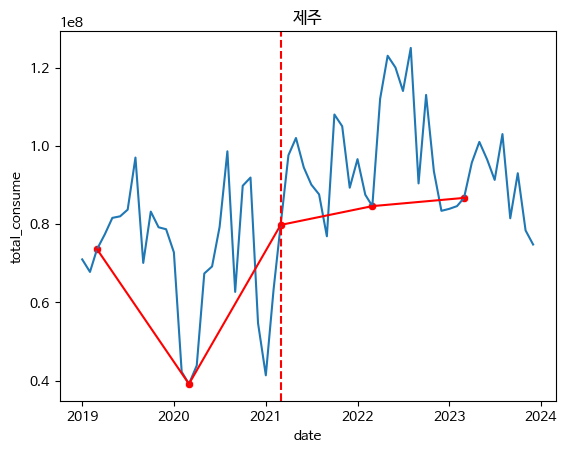

In [23]:
plt.title("제주")

sns.lineplot(data=grouped, x='date', y='total_consume')
sns.lineplot(data=grouped2, x='date', y='total_consume', color='red')
sns.scatterplot(data=grouped2, x='date', y='total_consume', color='red')
plt.axvline(x=highlight_date, color='red', linestyle='--')

In [24]:
grouped = df_tourpass_consume.query("region == '부산'")
grouped2 = df_tourpass_consume.query("region == '부산' and date_month == 2")

highlight_date = pd.to_datetime('2022-02-01')
highlight_data = grouped[grouped['date'] == highlight_date]

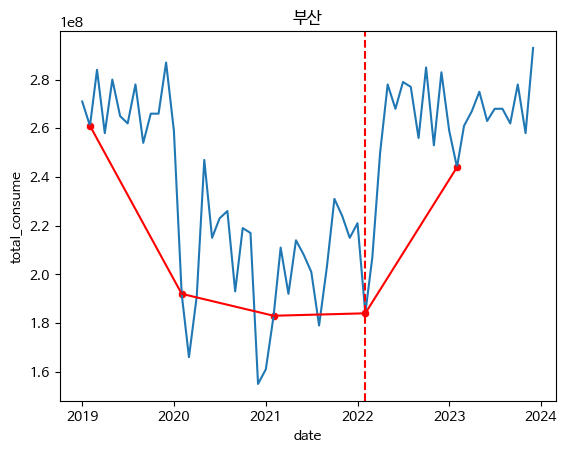

In [25]:
plt.title("부산")

sns.lineplot(data=grouped, x='date', y='total_consume')
sns.lineplot(data=grouped2, x='date', y='total_consume', color='red')
sns.scatterplot(data=grouped2, x='date', y='total_consume', color='red')
plt.axvline(x=highlight_date, color='red', linestyle='--')

In [26]:
grouped = df_tourpass_consume.query("region == '강원'")
grouped2 = df_tourpass_consume.query("region == '강원' and date_month == 7")

highlight_date = pd.to_datetime('2023-07-01')
highlight_data = grouped[grouped['date'] == highlight_date]

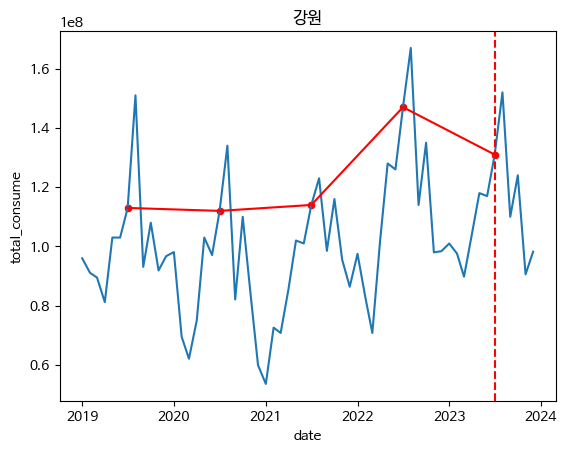

In [27]:
plt.title("강원")

sns.lineplot(data=grouped, x='date', y='total_consume')
sns.lineplot(data=grouped2, x='date', y='total_consume', color='red')
sns.scatterplot(data=grouped2, x='date', y='total_consume', color='red')
plt.axvline(x=highlight_date, color='red', linestyle='--')

In [28]:
grouped = df_tourpass_consume.query("region == '경기'")
grouped2 = df_tourpass_consume.query("region == '경기' and date_month == 7")

highlight_date = pd.to_datetime('2023-07-01')
highlight_data = grouped[grouped['date'] == highlight_date]

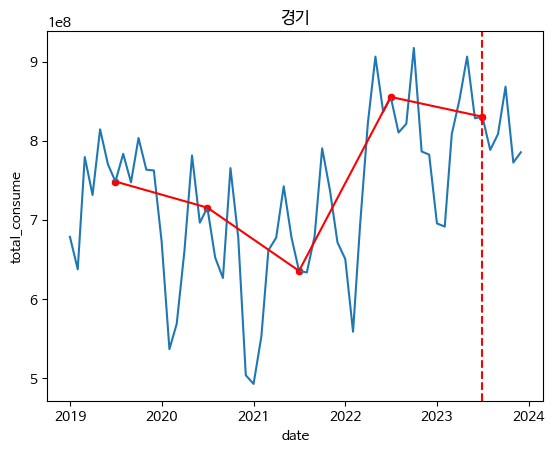

In [29]:
plt.title("경기")

sns.lineplot(data=grouped, x='date', y='total_consume')
sns.lineplot(data=grouped2, x='date', y='total_consume', color='red')
sns.scatterplot(data=grouped2, x='date', y='total_consume', color='red')
plt.axvline(x=highlight_date, color='red', linestyle='--')

- 

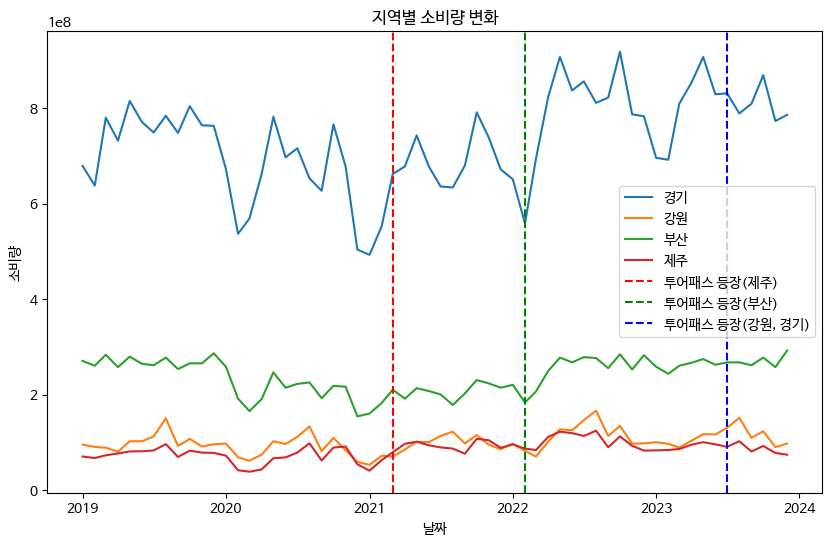

In [31]:
from pandas.plotting import register_matplotlib_converters

# 다중 축을 사용 그래프를 생성
fig, ax = plt.subplots(figsize=(10, 6))
# 지역별 방문자 수
sns.lineplot(data=df_tourpass_consume, x='date', y='total_consume', hue='region', ax=ax)
# 투어패스 도입 시점
ax.axvline(pd.to_datetime('2021-03-01'), color='r', linestyle='--', label='투어패스 등장(제주)')
ax.axvline(pd.to_datetime('2022-02-01'), color='g', linestyle='--', label='투어패스 등장(부산)')
ax.axvline(pd.to_datetime('2023-07-01'), color='b', linestyle='--', label='투어패스 등장(강원, 경기)')

plt.title('지역별 소비량 변화')
plt.xlabel('날짜')
plt.ylabel('소비량')
plt.legend()
plt.show()